# Import important libraries

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import scipy, scipy.stats
# this allows plots to appear directly in the notebook
%matplotlib inline

# Reading and studying data types

In [5]:
# read data into a DataFrame from the given link
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
#index_col=0 is to omit the index col (@index 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
#response--->sales
#features--->TV:radio:newspaper
# print the shape of the DataFrame
data.shape

(200, 4)

In [7]:
#search for missing values
data.isnull().sum() #no missing values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# visualizaing the data

In [8]:
# visualize the relationship between
#the features and the response using scatterplots

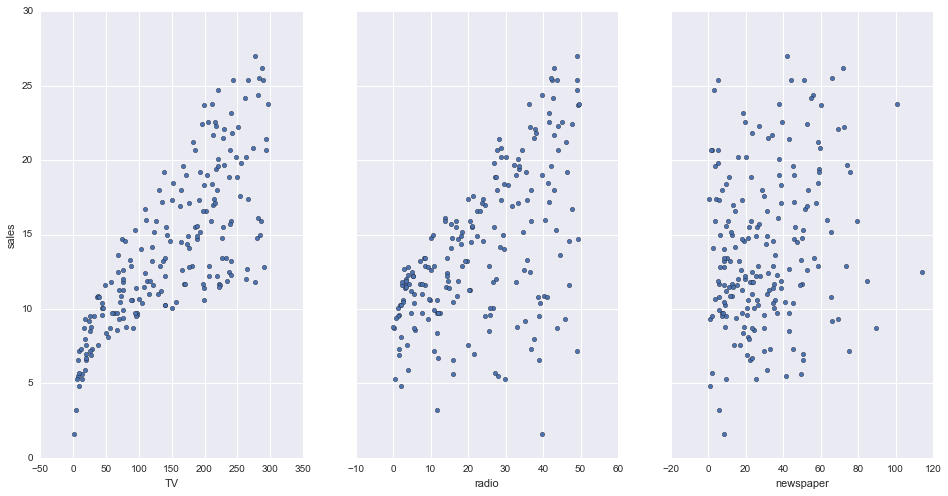

In [9]:
fig, axes = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axes[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axes[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axes[2])

In [10]:
#so the relation ship dows look linear

In [11]:
data.info()#gives data type of each column and mising values if any

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [12]:
data.describe()#descriptive stats on the data

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
#search for multicollinearity in data
data.corr()
#sales n TV highly co-rlated--GOOD for us
#no multicollinearity (linear-relation between independent variables) 
#in data---> GOOD for us

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


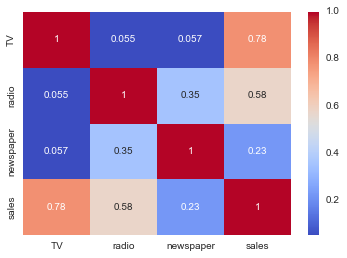

In [14]:
#see as a  plot
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

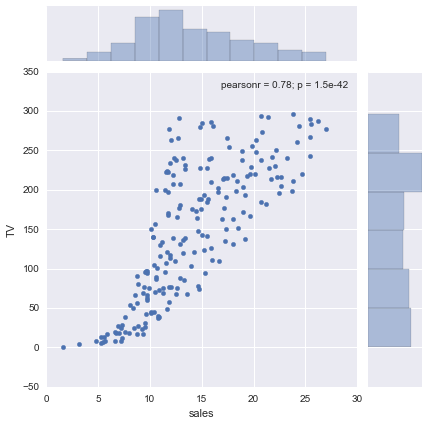

In [15]:
sns.jointplot(x=data['sales'],y=data['TV'])

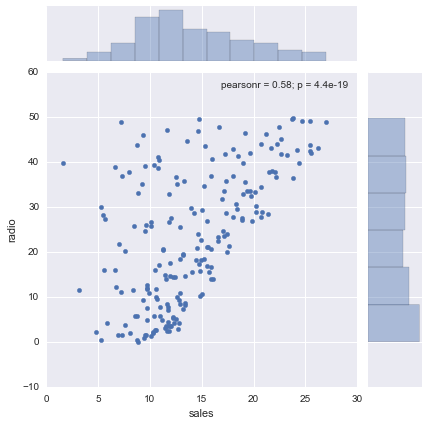

In [16]:
sns.jointplot(x=data['sales'],y=data['radio'])

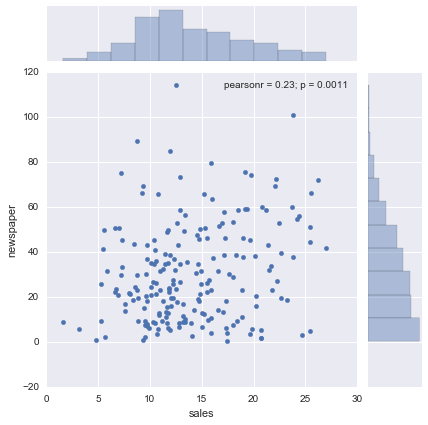

In [17]:
sns.jointplot(x=data['sales'],y=data['newspaper'])

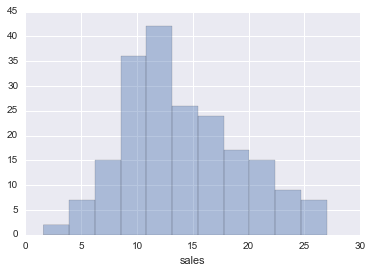

In [18]:
#histogram of DV, Sales
sns.distplot(data['sales'],kde=False)

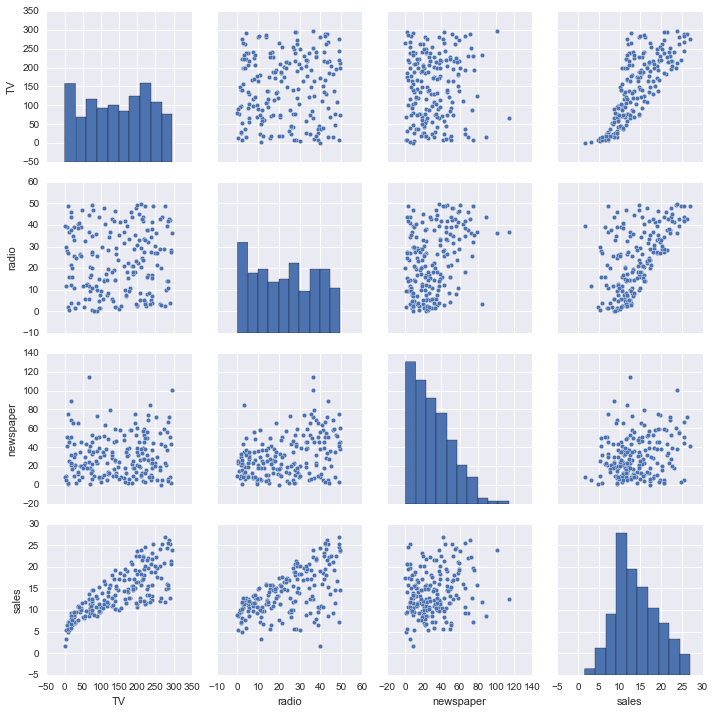

In [19]:
sns.pairplot(data)#spends on radio n newpaper is less compared to TV

# Building a Simple Linear Regression model

In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
data.shape

(200, 4)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["TV","radio","newspaper"]],data['sales'],test_size=0.3,random_state = 1 )

In [14]:
print y_train.head()
print y_test.shape

117    12.2
68     13.4
79      5.3
43     20.7
18     24.4
Name: sales, dtype: float64
(60L,)


In [15]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )#fit model on train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
linreg.intercept_ #intercept of the model

2.9372157346906125

In [17]:
#co-efficient of each DV- in the order given i.e."TV", "radio", "newspaper"
linreg.coef_

array([ 0.04695205,  0.17658644,  0.00185115])

In [18]:
pred=linreg.predict(X_test)
print pred[:5]

[ 21.66318307  16.44137936   7.69144625  17.9163172   18.67047113]


In [27]:
#SSE, RMSE, MAPE,R2 on the training data

In [28]:
import numpy as np
actual=np.array(y_train)
predicted=np.array(pred)
print predicted.shape
print actual.shape
SSE=sum((actual-predicted)**2)
print SSE

(140L,)
(140L,)
448.436442291


In [29]:
#RMSE
RMSE= (SSE/len(X_train))**0.5
print RMSE

1.78972552223


In [30]:
MAPE= sum(abs((actual-predicted)/actual))
print MAPE

22.3114686352


In [31]:
TSS= sum((actual- np.mean(y_train))**2)
print TSS

3899.62971429


In [32]:
R2=1-(SSE/TSS)
print R2

0.885005378678


In [33]:
#predicting on the test data
pred2=linreg.predict(X_test)
actual2=np.array(y_test)
predicted2=np.array(pred2)
print predicted2.shape
print actual2.shape
SSE2=sum((actual2-predicted2)**2)
print SSE2
#RMSE
RMSE2= (SSE2/len(X_test))**0.5
print RMSE2
MAPE2= sum(abs((actual2-predicted2)/actual2))
print MAPE2
TSS2= sum((actual2- np.mean(y_test))**2)
print TSS2
R2_2=1-(SSE2/TSS2)
print R2_2

(60L,)
(60L,)
115.735494448
1.38885741078
5.12730167728
1492.60183333
0.92246057062


In [34]:
temp=pd.DataFrame({"actual":actual2,
                   "predicted":predicted2})

temp.head()

,actual,predicted
0,23.8,21.663183
1,16.6,16.441379
2,9.5,7.691446
3,14.8,17.916317
4,17.6,18.670471


In [35]:
temp.corr()#gives corealtion of all umerical columns in a dataframe

,actual,predicted
actual,1.000000,0.960513
predicted,0.960513,1.000000


In [41]:
(temp["actual"].corr(temp["predicted"]))**2 # syntax is---> df['c1'].corr(df['c2']) to find corelation
#between only 2 columns 
# this answer sia same as R2. that means R2 is nothing but---> cor(actual,predicted)**2

0.92258486297375364

In [42]:
#the final equation of Linear regression becomes
#sales=2.9372+0.04*TV+0.176*radio+0.0018*newspaper
#this means the following interpretations
# 1) + coefficients means if we increase the amount spent, sales increase
# 2) Magnitutde shows by how much the sales increase if one columns is increased
# by one unit, keeping other columns colstant

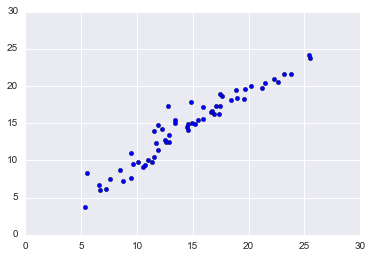

In [19]:
#predicting for the test data
y_pred = linreg.predict( X_test )
plt.scatter(y_test,y_pred) #plot the actaul vs predicted

In [44]:
#Comparing the predictions with actuals
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )

In [45]:
test_pred_df.head()

,actual,predicted,residuals
59,23.8,21.66,2.136817
41,16.6,16.44,0.158621
35,9.5,7.69,1.808554
103,14.8,17.92,-3.116317
185,17.6,18.67,-1.070471


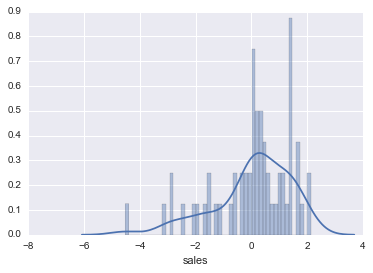

In [46]:
sns.distplot((y_test-y_pred),bins=50)

# Measuring model accuracy using metrics

In [47]:
from sklearn import metrics

In [48]:
#mean squared Error
MSE=metrics.mean_squared_error( y_test, y_pred )
print MSE

1.92892490747


In [49]:
rmse = np.sqrt(MSE)
print round( rmse, 2 )

1.39


In [50]:
#calculating R2
print metrics.r2_score(y_test, y_pred )

0.92246057062


In [51]:
#lets get the P values of each predictors 
from statsmodels.api import add_constant
X2 = add_constant(X_train)#add a constant to the model
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

const        6.008665e-12
TV           1.955223e-55
radio        5.406950e-33
newspaper    8.134656e-01
dtype: float64

In [52]:
#to see the summary just like in R
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     348.9
Date:                Mon, 04 Dec 2017   Prob (F-statistic):           1.18e-63
Time:                        23:26:17   Log-Likelihood:                -280.14
No. Observations:                 140   AIC:                             568.3
Df Residuals:                     136   BIC:                             580.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9372      0.390      7.540      0.0

In [53]:
#imporatnt parameters above
#P values
#R2
#Adjusted R2
#coef